## Exercise 1

In [11]:
from skimage import io, color, morphology
from skimage.util import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.filters import threshold_otsu
from skimage import segmentation
from skimage import measure
from skimage.color import label2rgb

In [16]:
def show_comparison(original, modified, modified_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap="gray")
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(modified, cmap="gray")
    ax2.set_title(modified_name)
    ax2.axis('off')
    io.show()

(1119, 2077, 3)
uint8


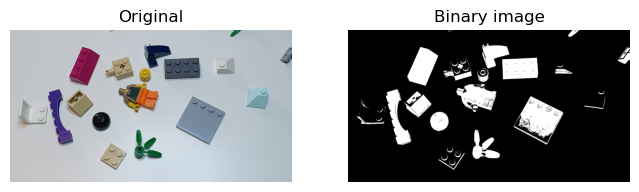

In [25]:
in_dir = "data/"

# X-ray image
im_name = "lego_4_small.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

print(im_org.shape)
print(im_org.dtype)

# Convert the image to grayscale.
grey = color.rgb2gray(im_org)
thresh = threshold_otsu(grey)
bin_img = grey < thresh

show_comparison(im_org, bin_img, 'Binary image')

## Exercise 2

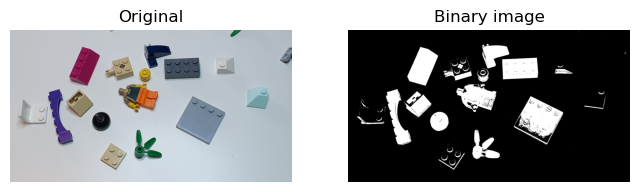

In [26]:
bin_img = segmentation.clear_border(bin_img)
show_comparison(im_org, bin_img, 'Binary image')

## Exercise 3

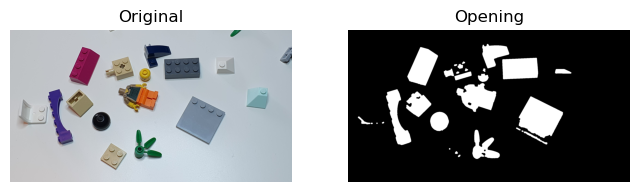

In [36]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk

footprint = disk(5)
closing_img = closing(bin_img, footprint)
footprint = disk(5)
img_open = opening(closing_img, footprint)

show_comparison(im_org, img_open, 'Opening')

## Exercise 4

In [37]:
label_img = measure.label(img_open)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

Number of labels: 29


## Exercise 5

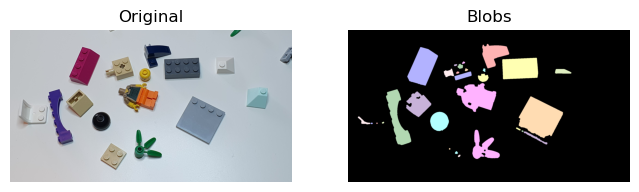

In [39]:
#We can use the function label2rbg to create a visualization of the found BLOBS. Show this together with the original image.
rgb_label_img = label2rgb(label=label_img, image=img_open)
show_comparison(im_org, rgb_label_img, 'Blobs')


## Exercise 6

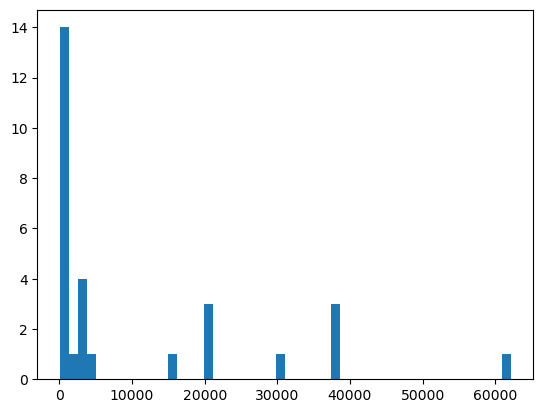

In [40]:
region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])
plt.hist(areas, bins=50)
plt.show()

## Exercise 7

In [ ]:
# dope

## Exercise 8

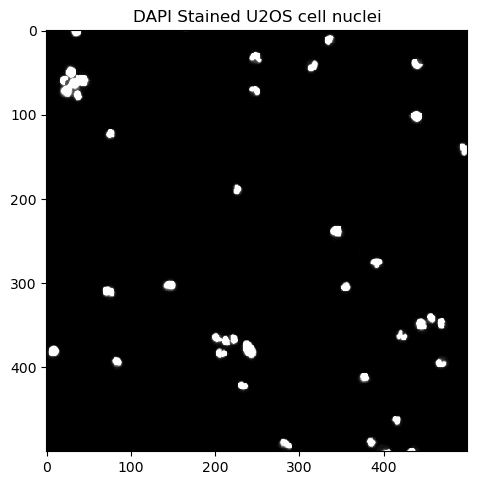

In [53]:
in_dir = "data/"
img_org = io.imread(in_dir + 'Sample E2 - U2OS DAPI channel.tiff')
# slice to extract smaller image
img_small = img_org[700:1200, 900:1400]
img_gray = img_as_ubyte(img_small) 
io.imshow(img_gray, vmin=0, vmax=30)
plt.title('DAPI Stained U2OS cell nuclei')
io.show()

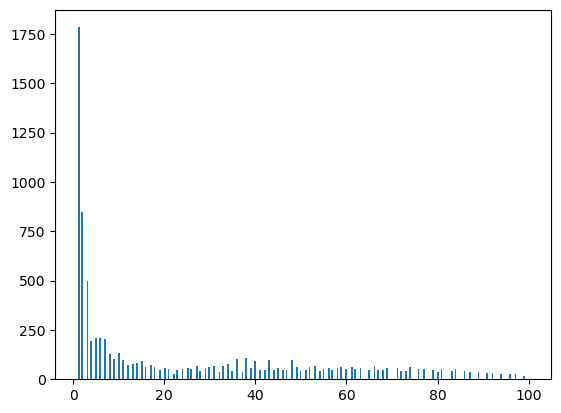

In [54]:
# avoid bin with value 0 due to the very large number of background pixels
plt.hist(img_gray.ravel(), bins=256, range=(1, 100))
io.show()

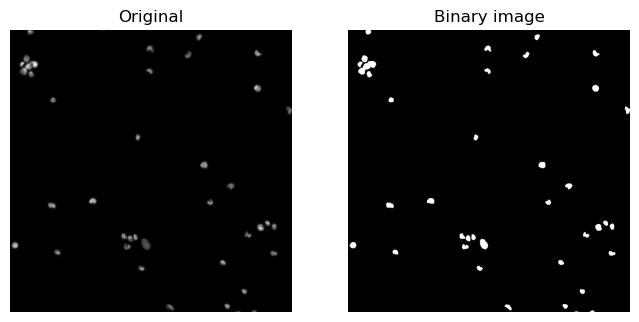

In [59]:
# Convert the image to grayscale.

thresh = threshold_otsu(img_gray)
bin_img = img_gray > thresh

show_comparison(img_small, bin_img, 'Binary image')

## Exercise 9

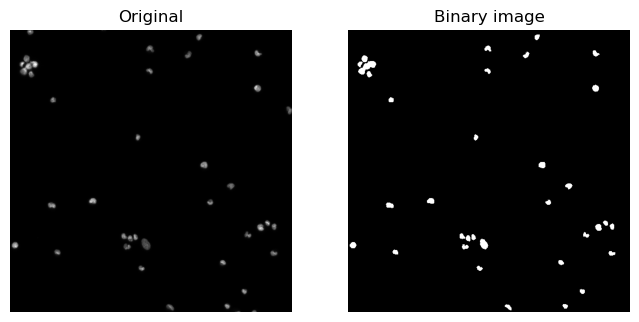

In [60]:
clear_img=segmentation.clear_border(bin_img)
show_comparison(img_small, clear_img, 'Binary image')

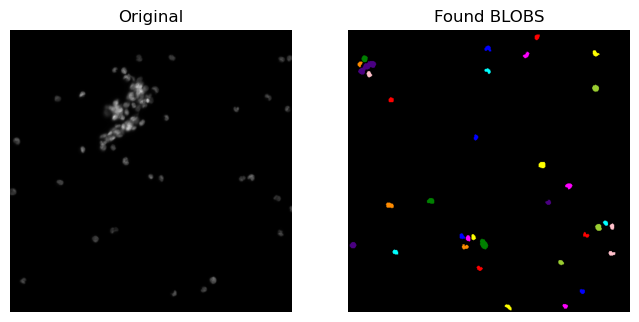

In [61]:
label_img = measure.label(clear_img)
image_label_overlay = label2rgb(label_img)
show_comparison(img_org, image_label_overlay, 'Found BLOBS')

## Exercise 10

71.0


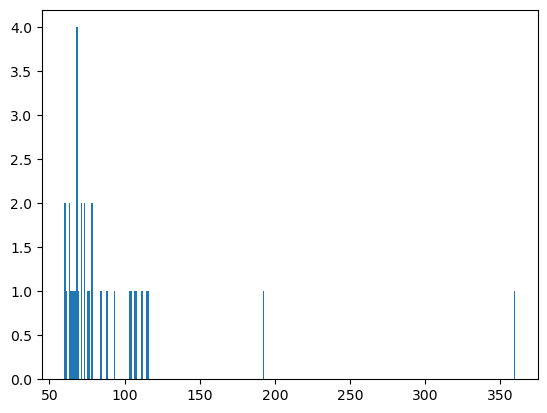

In [69]:
region_props = measure.regionprops(label_img)
print(region_props[0].area)
areas = np.array([prop.area for prop in region_props])
plt.hist(areas, bins=300)
io.show()

## Exercise 11

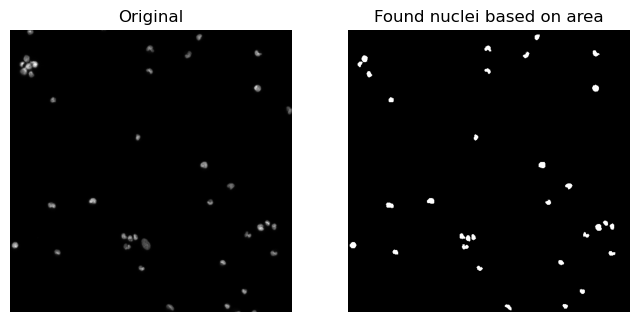

In [70]:
min_area = 50
max_area = 150

# Create a copy of the label_img
label_img_filter = label_img
for region in region_props:
	# Find the areas that do not fit our criteria
	if region.area > max_area or region.area < min_area:
		# set the pixels in the invalid areas to background
		for cords in region.coords:
			label_img_filter[cords[0], cords[1]] = 0
# Create binary image from the filtered label image
i_area = label_img_filter > 0
show_comparison(img_small, i_area, 'Found nuclei based on area')

## Exercise 12

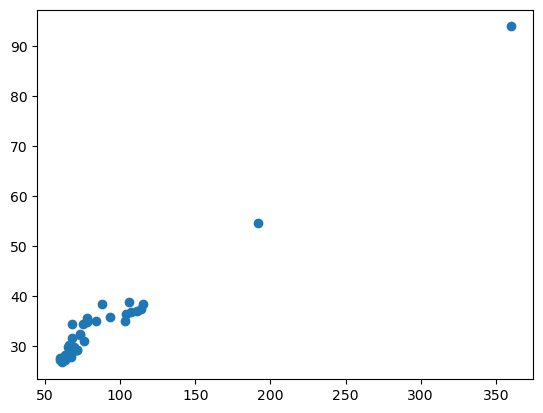

In [72]:
perimeters = np.array([prop.perimeter for prop in region_props])

plt.scatter(areas, perimeters)
io.show()

## Exercise 13

[1.0383091544711966, 0.7505411494367248, 0.8631452958435077, 0.8094148936992093, 0.9871969042057738, 0.5137249089202347, 0.9929279952982467, 0.8581145593082395, 0.9956925618312447, 0.9808208202866291, 1.0816630244914995, 0.9996231611452789, 1.0289111806463285, 0.9119085078947078, 0.9967836950673131, 0.9128633272113803, 0.8881111816517121, 1.073023680704148, 1.0354052171764776, 1.0205181199832836, 0.7227471202707104, 0.8879392742754697, 1.0154901954491722, 1.0383091544711966, 0.8115014262220659, 1.05838054133192, 0.7753006382899146, 0.9699095828004404, 0.869279541344956, 1.0354052171764774, 0.9198566141545935, 1.0611800412661492, 0.797147559122107, 1.0106476583487132]


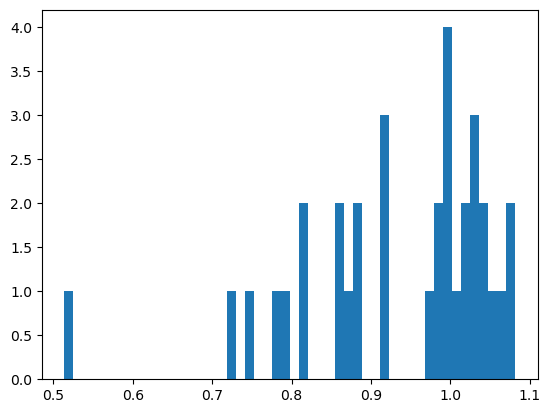

In [75]:
circ = [4 * math.pi * areas / perimeters**2 for areas, perimeters in zip(areas, perimeters)]
print(circ)
plt.hist(circ, bins=50)
io.show()

## Exercise 14

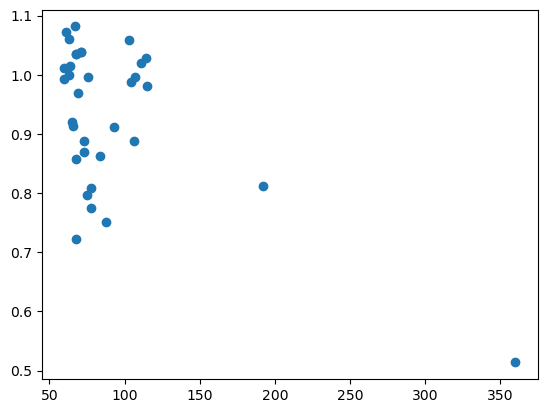

In [76]:
plt.scatter(areas, circ)
io.show()